
# Linear Transformation Assignment 

## Capture the Coin: A Matrix Transformation Game

**<div style="text-align: right"> [TOTAL SCORE: 30]</div>**

In this assignment, you are going to visualize how linear transformation and matrix operations can be used to manipulate shapes in a 2D space by controlling a playable character and making it capture the coin in the playground. The main objective of this assignment is to be able to formulate the transformation problems as matrix multiplication and implementing them using python and numpy. 

### Pre-requisite concepts

Before delving into the problem, it is important for you to understand 2 main concepts:

#### 1. Homogeneous coordinates  

From the lesson and quiz, you must have realized that translation is not a linear operation as it doesn't fix the origin. However, it can be converted into a linear operation by introducing an additional dimension in our operation which transforms the system into what is called a *Homogeneous Co-ordinate System*.

For example,
In normal 2D co-ordinate system, we have a point $\begin{bmatrix} x \\ y \end{bmatrix}$

In Homogeneous co-ordinate system, the same point is represented as $\begin{bmatrix} x \\ y \\1 \end{bmatrix}$

Due to this, the $2 \times 2$ transformation matrices that you learned for 2D spaces are now transformed into $3 \times 3$ transformation matrices as follows:

$
\begin{bmatrix}
a & b \\
c & d \\
\end{bmatrix}
\to
\begin{bmatrix}
a & b & 0 \\
c & d & 0 \\
0 & 0 & 1
\end{bmatrix}
$

Now, in this *homogeneous coordinate system*, the translation operation can also be formulated as a matrix operation by the following matrix:

$
\begin{bmatrix}
1 & 0 & t_x \\
0 & 1 & t_y \\
0 & 0 & 1
\end{bmatrix}
$
 where, $t_x$ gives the translation amount along x-axis and $t_y$ gives the translation amount along y-axis

#### 2. Rotation about points other than origin

Until now, the rotation operation studied was done taking the origin $(0,0)$ as the pivot. To rotate any point or shape about other points, we need to perform the following steps:

1. Translate all the *to be rotated* points such that the *pivot* point $(a,b)$ is translated to the origin $(0,0)$.

2. Rotate the *to be rotated* points about the origin $(0,0)$ using the rotation matrix already discussed.

3. Translate all the *rotated* points such that the *pivot* point is translated back from the origin $(0,0)$ to its original location $(a,b)$

Also note that all these transformation operations can be represented by a single composite transformation matrix. Such a matrix can be obtained by the matrix multiplication of the involved transformation matrices such that the order in which the operation is applied is preserved.

### Problem Statement

Your main task in this assignment is to find the transformation matrix, use it to change the player's position in the 2D space and reach the location of the coin to capture it. The player in this game is a 2D diamond (rectangle) which has 4 points. Initially, the player is placed such that its tail is at the origin.

Go through the instructions properly as you attempt to solve the task.

Start by importing the packages essential for this task.

In [13]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.patches import Polygon, Circle
import math

### API Documentation

This section demonstrates the functions that you need to use to perform the task.

For trigonometric operation needed in the task, you can use the following trigonometric utility functions:

a) ```cos(x)``` returns the cosine of an angle.

b) ```sin(x)``` returns the sine of an angle. 

c) ```tan(x)``` returns the tangent of an angle.

The angle ```x``` should be in degrees

The playable shape is controlled using the object ```player``` which is an instance of the ```Player``` class. 

The position of the player is represented by the following position matrix:
$$
\begin{bmatrix}
x_1 && x_2 && x_3 && x_4 \\
y_1 && y_2 && y_3 && y_4
\end{bmatrix}
$$
where $(x_1,y_1), (x_2,y_2), (x_3,y_3), (x_4,y_4)$ are the four vertices of the diamond.

The ```player``` object will be created for you but you might need to use the following class methods to perform the task:

1. ```get_position()```

This method returns the current position matrix of the player as a ```numpy``` 2D array.

2. ```set_position(new_position)```

This method sets the ```new_position``` matrix as the current position of the player. It expects a ```numpy``` 2D array as input.

3. ```get_orientation()```

This method returns the angle made by the vector joining the tail and head of the player at its current orientation with the positive x-axis.

4. ```get_tail_location()```

This method returns the co-ordinate points of the tail, i.e. $\begin{bmatrix} x1 & y1 \end{bmatrix}$. The returned points are arranged in a ```numpy``` array of dimension (1,)

In [14]:
#Defining the trigonometric utility functions

def cos(x):
    '''returns the cosine of an angle in degrees'''
    return math.cos(x*math.pi/180)

def sin(x):
    '''returns the sine of an angle in degrees'''
    return math.sin(x*math.pi/180)

In [15]:
#Defining the classes and their respective methods necessary to control the player and the scene.

class Scene:
    '''The class to manage and display objects on the playground'''
    def __init__(self, xlimits, ylimits, grid_width):
        self.xlimits = xlimits
        self.ylimits = ylimits
        self.stepsize = grid_width
        
    def plot(self, player):
        fig = plt.figure(figsize=(12,12))
        ax = plt.axes()
        ax.xaxis.set_ticks(np.arange(*self.xlimits, self.stepsize))
        ax.yaxis.set_ticks(np.arange(*self.ylimits, self.stepsize))
        ax.plot([0,0],self.ylimits,zorder=1)
        ax.plot(self.xlimits,[0,0],zorder=1)
        player_shape = Polygon(player.get_plot_points(), color=[0.8,0.2,0], zorder=2)
        ax.add_patch(player_shape)
        target_pos = [20*math.sqrt(5)*cos(33.434948), 20*math.sqrt(5)*sin(33.434948)]
        xs = [0.0,40*cos(60),target_pos[0]]
        ys = [0.0,40*sin(60),target_pos[1]]
        ax.plot(xs, ys, 'm--')
        target_shape = Circle(target_pos, radius=1, color=[0,0.8,0.5], zorder=3)
        ax.add_patch(target_shape)
        plt.grid()
        plt.show()
        
        
class Player:
    '''The class to manage the position of the playable shape'''
    def __init__(self):
        self._position = np.array([[0,2.5,5,2.5],[0,1,0,-1],[1,1,1,1]])
        
    def get_orientation(self):
        '''Returns the angle (in degrees) made by the player's orientation with the positive x-axis'''
        tail = self._position[:2,0].ravel()
        head = self._position[:2,2].ravel()
        orientation_vec = head-tail
        orientation = np.arctan2(orientation_vec[1], orientation_vec[0])
        return orientation*180/math.pi
    
    def get_plot_points(self):
        return self._position[:2,:].T
    
    def get_position(self):
        '''Returns the position matrix which gives the points that define the position of the player.'''
        return self._position
    
    def get_tail_location(self):
        '''Returns the coordinates of the tail of the player'''
        tail = self._position[:2,0].ravel()
        return tail
    
    def set_position(self, position_matrix):
        '''Set the points that define the position of the player. Takes a matrix of points as param'''
        self._position = position_matrix
        

Take a look at the playground. The red diamond is the player, the blue circle is the target coin and the pink dotted lines represent the path that the player has to follow to reach the goal. You will be using matrix operations to move the player along this path. 

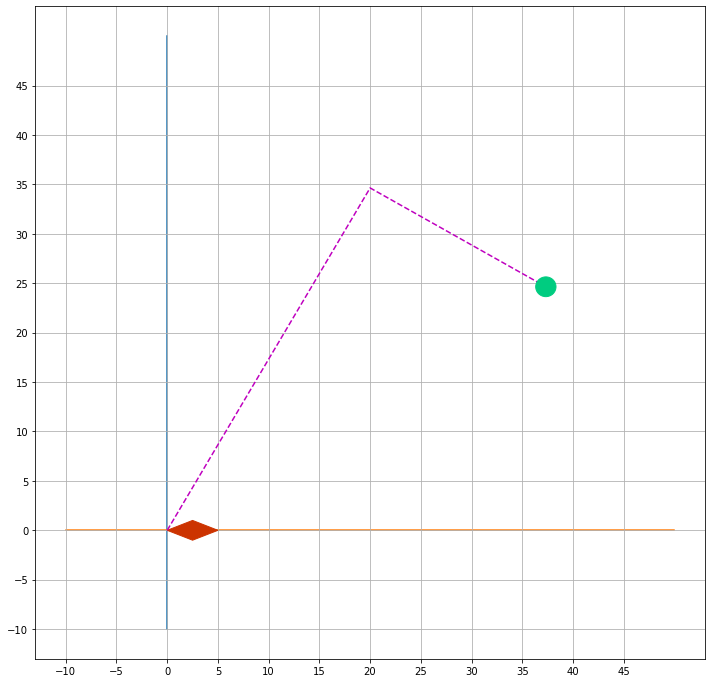

In [16]:
#Creation of the Scene and the Player objects
scene = Scene((-10,50),(-10,50),5)
player = Player()
scene.plot(player)

## Exercise 1: Align the Player
<b><div style="text-align: right">[POINTS: 5]</div></b>
Your first task is to align the player with the path it is supposed to follow. Do this by rotating the player (i.e. all the points that define it) about its tail location which is at origin by 60$^{\circ}$ in anti-clockwise direction.

**Task:** 
Find the rotation matrix required for this task in homogeneous co-ordinate system and assign it to the variable ```transformation_1```. Use this to transform the points and set the new position of the player using its ```set_position()``` method.


In [17]:
transformation_1 = None
# YOUR CODE HERE
x=60
transformation_1 = [[cos(x),-sin(x),0],[sin(x),cos(x),0],[0,0,1]]
player.set_position(np.matmul(transformation_1,player.get_position()))
print(transformation_1)
print(player.get_position())

[[0.5000000000000001, -0.8660254037844386, 0], [0.8660254037844386, 0.5000000000000001, 0], [0, 0, 1]]
[[0.         0.3839746  2.5        2.1160254 ]
 [0.         2.66506351 4.33012702 1.66506351]
 [1.         1.         1.         1.        ]]


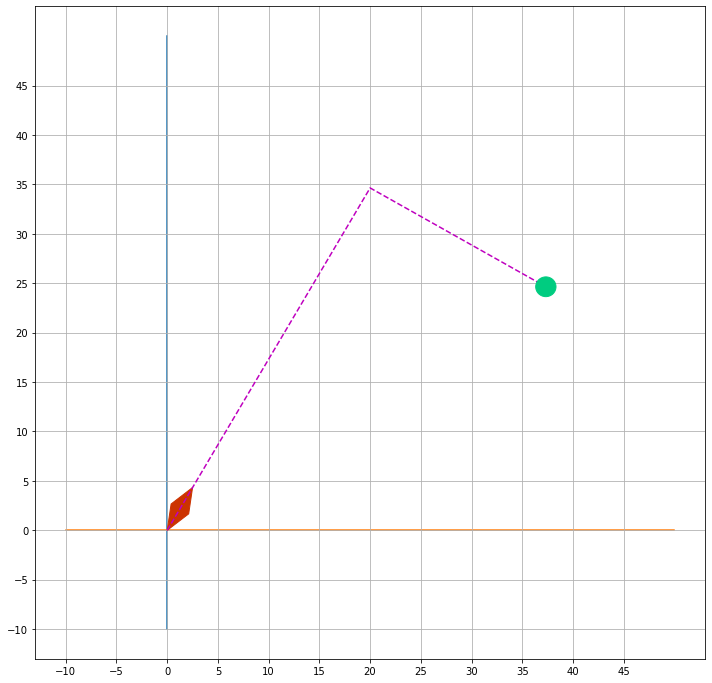

In [18]:
assert transformation_1 is not None
scene.plot(player)


## Exercise 2: Move the Player
<b><div style="text-align: right">[POINTS: 5]</div></b>
Your second task is to move the player by 40 units in the direction of its current orientation. This will make the player reach the peak in the path shown in the playground.

**Task:** 
Find the translation matrix required for this task in homogeneous co-ordinate system and assign it to the variable ```transformation_2```. Use this to transform the points and set the new position of the player using its ```set_position()``` method.


In [19]:
transformation_2 = None

# YOUR CODE HERE
theta = player.get_orientation()
transformation_2 = [[1,0,40*cos(theta)],
                             [0,1,40*sin(theta)],
                             [0,0,1]]
player.set_position(np.matmul(transformation_2,player.get_position()))
# print(transformation_2)
# print(player.get_position())

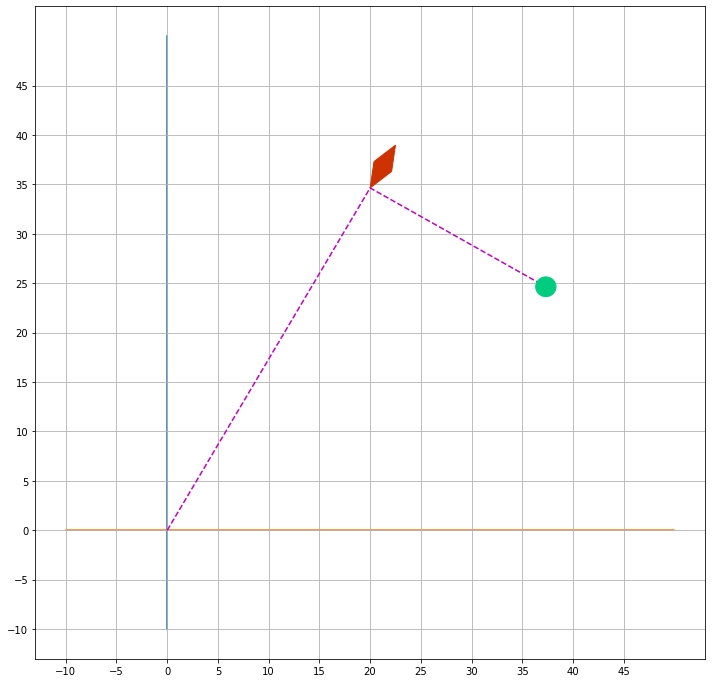

In [20]:
assert transformation_2 is not None
scene.plot(player)


## Exercise 3: Rotate the Player
<b><div style="text-align: right">[POINTS: 15]</div></b>
Your third task is to rotate the player (i.e. all the points that define it) by 90$^{\circ}$ in clockwise direction about its tail location. Please note that since the tail is now not at origin, this task is rotation about an arbitrary point other than origin.

**Task:** 
Find the composite transformation matrix (the single matrix that represents all sub-operations involved) required for this task and assign it to the variable ```transformation_3```. Use this to transform the points and set the new position of the player using its ```set_position()``` method.



In [21]:
transformation_3 = None

# YOUR CODE HERE
x=-90
theta = player.get_orientation()
transformation_back_to_origin = [[1,0,-40*cos(theta)],[0,1,-40*sin(theta)],[0,0,1]]
transformation_3 =np.matmul(np.array([
    [cos(x),-sin(x),40*cos(theta)],
    [sin(x),cos(x),40*sin(theta)],
    [0,0,1]
    ]),transformation_back_to_origin) 
player.set_position(np.matmul(transformation_3,player.get_position()))

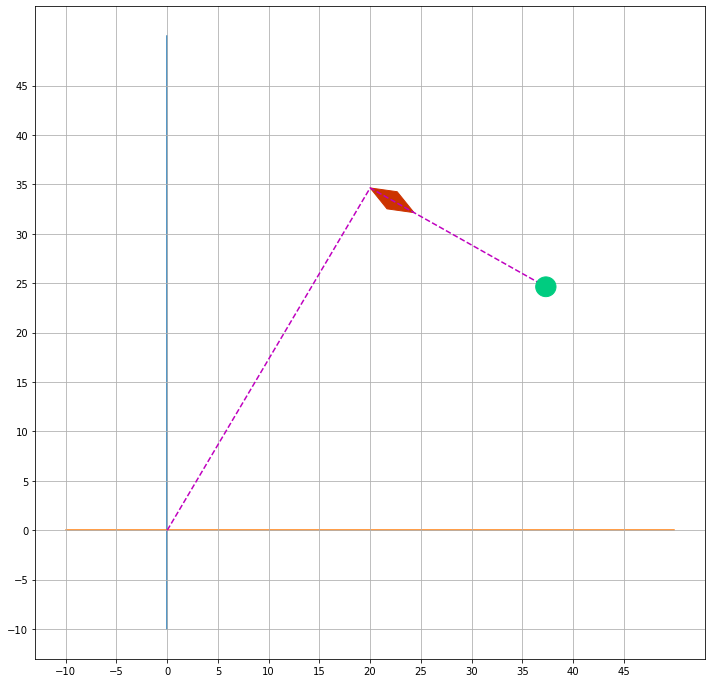

In [22]:
assert transformation_3 is not None
scene.plot(player)


## Exercise 4: Rotate the Player
<b><div style="text-align: right">[POINTS: 5]</div></b>
Your fourth task is to move the player by 20 units in the direction of its current orientation.

**Task:** 
Find the translation matrix required for this task in homogeneous co-ordinate system and assign it to the variable ```transformation_4```. Use this to transform the points and set the new position of the player using its ```set_position()``` method.




In [23]:
transformation_4 = None

# YOUR CODE HERE
theta = player.get_orientation()
transformation_4= np.array([
                    [1,0,20*cos(theta)],
                    [0,1,20*sin(theta)],
                    [0,0,1]]
)
player.set_position(np.matmul(transformation_4,player.get_position()))

# print(transformation_4)
# print(player.get_position())

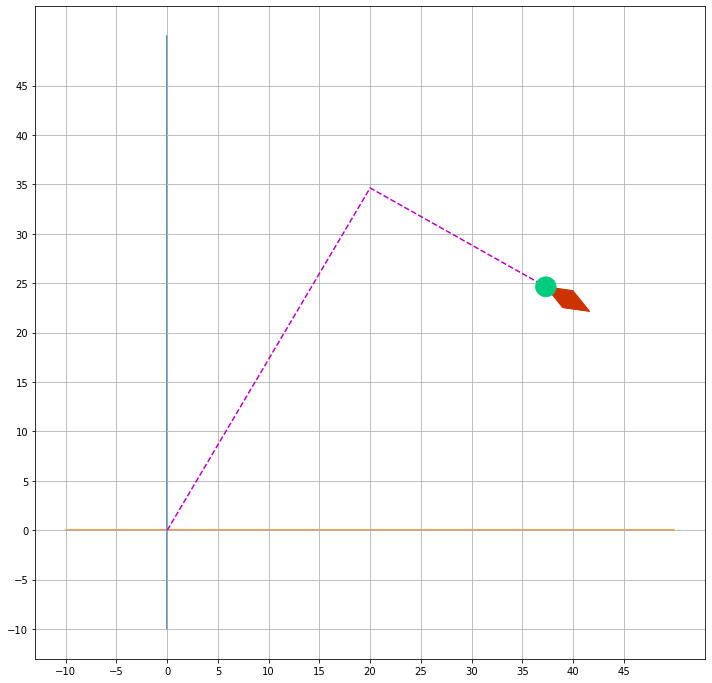

In [24]:
assert transformation_4 is not None
scene.plot(player)
